## Gaussian 2-Clusters
In this problem, we will investigate how to make categorization decisions for two categories, where each is defined as a Gaussian distribution. First, you will derive the probability of an item being in one category or another. Then, we will explore how the variances and prior probability of each category affect the posterior and predictive distributions. 

For this problem, we will assume that data are generated by first picking which of two categories $c=1,2$ it belongs to (according to their prior probability) and then generating the datum according to the corresponding category's likelihood. This results in the following generative process:

$
\begin{align*}
c_n | \theta \sim {\rm Bernoulli}(\theta)   & \qquad \qquad \qquad & x_n | \mu_{c(n)}, \sigma_{c(n)}^2 \overset{iid}{\sim} {\rm N}(\mu_{c(n)}, \sigma_{c(n)}^2)
\end{align*}
$

Note that $c(n)$ is the same as $c_n$. I use parentheses rather than a subscript to avoid having something that is 
``double subscripted.''. In generative process notation, $c_n | \theta \sim {\rm Bernoulli}(\theta)$ means that $c_n$, the category for data point $n$, is a Bernoulli random variable with parameter $\theta$. This means $c_n$ will be $1$ with probability $\theta$ (and so with probability $1-\theta$, $c_n=2$). So, the prior probability of category 1 is $\theta$ ($P(c_n=1)=\theta$). For all of Problem 2, assume $\mu_1=-1$ and $\mu_2=1$.

### a. Derivation: Categorization

 Using Bayes' rule, derive the probability of a single datum being in category 1: $P(c_1=1|x_1)$.\footnote{If you are wondering why $P$ is uppercase here and lowercase in other cases, it has to do with whether it is a probability mass (uppercase) or density (lowercase) function. You do not have to worry about this distinction (I mess it up sometimes too!), but as a general rule, you should use the uppercase $P(\cdot)$ when it is a discrete random variable and the lowercase $p(\cdot)$ when it is a continuous random variable.} You can assume that the values of $\mu_1, \mu_2, \sigma^2_1,$ and $\sigma^2_2$ are given parameters (I didn't put them to the right of the $|$ to save space). Show your work (if you do not know how to create equations on a computer, you can scan your handwritten derivation and include it as an image into your document). 
 
As the next problem depends on this answer, I will give you what your derivation should end up with. It is
 
 $
 \begin{equation*}
P(c=1|x_1) = \frac{\theta {\rm N}(x_1; \mu_1, \sigma_1^2)}{\theta {\rm N}(x_1; \mu_1, \sigma_1^2) + (1-\theta){\rm N}(x_1; \mu_2, \sigma_2^2)}
\end{equation*}
 $
 
where $N(x;\mu,\sigma^2)$ is the probability density of $x$ from a Normal distribution with mean $\mu$ and variance $\sigma^2$.


$$P(c_1 = 1 | x_1) = 
\frac{P(x_1 | c_1 = 1) * P(c_1 = 1)}{P(x_1)} =
\frac{P(x_1 | c_1 = 1) * P(c_1 = 1)}{\sum_{i=1}^{2} P(x_1 | c_1 = i)*P(c_1 = i)}
$$

$$
= \frac{N(x_1; \mu_1, \sigma^2_1) * \theta}
{(N(x_1; \mu_1, \sigma^2_1) * \theta) + (N(x_1; \mu_2, \sigma^2_2) * (1 - \theta))}
$$

### b. Categorization

Calculate and plot the probability of being in category 1 (so, the x-axis is the $x_1$ value and the y-axis is $P(c_1=1|x_1)$) for $\theta = 0.5$ and for $\theta = 0.75$ with $\sigma_1^2=\sigma_2^2=1$ (remember $\mu_1 = -1$ and $\mu_2=1$). Next, calculate and plot the probability of being in category 1 for $\theta = 0.5$ when $\sigma_1^2=0.5$ and $\sigma_2^2=2$. Do this again, but for $\theta=0.75$. Please make sure all of your plots show all of the interesting behavior (so make sure the range of your x- and y-axes are appropriate). Describe the effect of changing the prior and the variance on categorization decisions. What is the effect of varying them? Do they have the same effect? Why do they or why do they not? 

In [1]:
import seaborn as sb # plotting software built on matplotlib. It's just nicer.
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
c_to_idx = {1: 0, 2:1}
c_to_other = {0: 1, 1:0}
mu_values = [-1, 1]
var_values = [[1.0, 1.0], [0.5, 2.0]]

def prob_c_given_x(c, x, mu_values, var_values, theta_priors):
    idx = c_to_idx[c]
    idx_other = c_to_other[idx]
    mu = mu_values[idx]
    var = var_values[idx]
    num = theta_priors[idx]*norm.pdf(x, loc=mu, scale=var)
    denom = np.sum([t*norm.pdf(x, m, v) for (m, v, t) in zip(mu_values, var_values, theta_priors)])
    y_plot = num / denom
    return y_plot

In [19]:
x_plot = np.linspace(-3,+3,100)

dfs = []
theta_values = [0.5, 0.75]
for v in var_values:
    for theta in theta_values:
        theta_priors = [theta, 1-theta]
        # print(v, theta, theta_priors)
        y_plot = prob_c_given_x(1, x_plot, mu_values, v, theta_priors)
        df = pd.DataFrame({'X':x_plot, 'y': y_plot, 'Setup':f'sigma^2 {v}, theta{theta_priors}'})
        dfs.append(df)

df_plot = pd.concat(dfs)
# display(df_plot)

Text(0, 0.5, 'P(c_1 = 1 | x_1)')

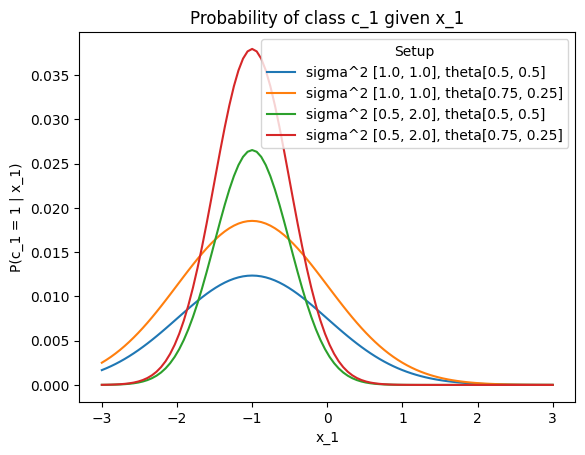

In [20]:
sb.lineplot(df_plot, x='X', y='y', hue='Setup')
plt.title('Probability of class c_1 given x_1')
plt.xlabel('x_1')
plt.ylabel('P(c_1 = 1 | x_1)')

Describe the effect of changing the prior and the variance on categorization decisions. What is the effect of varying them? Do they have the same effect? Why do they or why do they not? 

Placing more prior weight on category 1 results in an overall greater probability of being in category 1 around $\mu_1 = -1$. To elaborate, the probability is higher regardless of the choice of $x_1$.

The effect of decreasing $\sigma_1^2$ and increasing $\sigma_2^2$ is a tigheting of the probability density function around $\mu_1 = -1$. To elaborate, values closer to the mean have a higher probability and values further away have a lower probability when compared to the default parameters.

### c. Derivation --- Prediction 

Using Bayes' rule and the {\em Law of Total Probability}, derive the probability of a data point $p(x)$ according to this model (note, this is without any given data). As the next problem depends on this answer, I will give you what your derivation should end up with. It is

$
\begin{equation*}
p(x_1) = \theta {\rm N}(x_1; \mu_1, \sigma_1^2) + (1-\theta){\rm N}(x_1; \mu_2, \sigma_2^2)
\end{equation*}
$

$$
p(x_1) = \sum_{c} p(x_1, c_1 = c) =
p(x_1, c_1 = 1) + p(x_1, c_1 = 2) = 
$$

$$
p(x_1 | c_1 = 1)*p(c_1 = 1) + p(x_1 | c_1 = 2)*p(c_1 = 2) =
$$

$$
p(x_1 | c_1 = 1)\theta + p(x_1 | c_1 = 2)(1-\theta) =
N(x_1; \mu_1, \sigma_1^2) \theta + N(x_1; \mu_2, \sigma_2^2) (1-\theta)
$$

### d. Prediction

As before, plot $p(x_1)$ for $\theta = 0.5$, and then for $\theta =  0.75$ with $\sigma_1^2=\sigma_2^2=1$. Next, calculate and plot $P(x_1)$ for $\theta = 0.5$ when $\sigma_1^2=0.5$ and $\sigma_2^2=2$. Do this again, but for $\theta=0.75$. How does the prior and variance of the likelihood affect $p(x_1)$?  Please make sure all of your plots show all of the interesting behavior (so make sure the range of your x- and y-axes are appropriate). Describe the effect of changing the prior and the variance on $p(x_1)$. What is the effect of varying them? Do they have the same effect? Why do they or why do they not? 

Note that $p(x_1)$ is sometimes called the *marginal data distribution* and this type of model is called a *mixture model* because it composes a new probability distribution by``mixing'' two (or more) distributions together.


In [29]:
def prob_x(x, mu_values, var_values, theta_priors):
    return np.sum([t*norm.pdf(x, m, v) for (m, v, t) in zip(mu_values, var_values, theta_priors)], axis=0) # axis=0 does pairwise sums in this context, which is what we want

x_plot = np.linspace(-3,+3,100)

dfs = []
theta_values = [0.5, 0.75]
for v in var_values:
    for theta in theta_values:
        theta_priors = [theta, 1-theta]
        # print(v, theta, theta_priors)
        y_plot = prob_x(x_plot, mu_values, v, theta_priors)
        df = pd.DataFrame({'X':x_plot, 'y': y_plot, 'Setup':f'sigma^2 {v}, theta{theta_priors}'})
        dfs.append(df)

df_plot = pd.concat(dfs)
# display(df_plot)

Text(0, 0.5, 'p(x_1)')

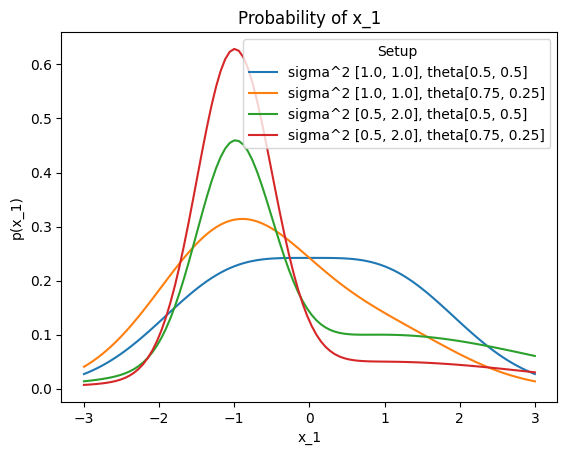

In [30]:
sb.lineplot(df_plot, x='X', y='y', hue='Setup')
plt.title('Probability of x_1')
plt.xlabel('x_1')
plt.ylabel('p(x_1)')